<h1><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h1>

Before submitting, **please**, make sure that your notebook runs **without errors** in Python 3.6
and **reproduces your solution as intended**, when you **Restart the Kernel and re-run the whole
notebook**!
<span style="color:red;">You will be severely penalized if you notebook does not run.</span>

Whereever applicable your solution will be graded based on the **plots**, generated by
**your code** on **TA's** computer.

<hr/>

# <span style="color:purple">Shumovskaia Valentina</span>

# Home Assignment 4

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

<br/> <!--Intentionally left blank-->

# GLM Bayesian Models (35 pt.)

In [1]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

## Task 1 (5 pt.): Theoretical problem

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**

$
\begin{align}
& p(X|\mu, \tau) = \frac{\tau^{n/2}}{(2\pi)^{n/2}}\exp\Bigl( -\frac{\tau}{2}\sum_{i=1}^n(x_i-\mu)^2 \Bigr) \\
& p(\mu,\tau) = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1}) \otimes \text{Gamma}(\tau; a, b)
= \frac{b^a}{\Gamma(a)}\frac{\beta^{1/2}}{(2\pi)^{1/2}}\tau^{a-\frac{1}{2}}e^{-\tau b}\exp\Bigl( -\frac{\tau}{2}\beta(\mu-\mu_0)^2 \Bigr)\\
& p(\mu, \tau|X) \propto p(X|\mu,\tau) p(\mu,\tau) \propto 
\tau^{\frac{n}{2} + a - \frac{1}{2}} e^{-b\tau} \exp\Bigl( -\frac{\tau}{2}\bigl(\beta(\mu-\mu_0)^2 + \sum_{i=1}^n(x_i-\mu)^2 \bigr)\Bigr)\\
& p(\mu, \tau|X) \propto \tau^{\frac{n}{2} + a - \frac{1}{2}} e^{-b\tau} \exp\Bigl( (\beta + n)\bigl(\mu - \frac{\beta\mu_0 + n\bar x}{\beta+n} \bigr)^2 + \frac{\beta n (\bar x - \mu_0)^2}{\beta + n} + \sum_{i=1}^n(x_i-\bar x)^2\Bigr)\\
& p(\mu, \tau|X) \propto \mathcal N \bigl( \mu ; \frac{\beta\mu_0 + n\bar x}{\beta + n}, ((\beta+n)\tau)^{-1}  \bigr) \otimes \text{Gamma}\bigl( \tau ; a + \frac{n}{2}, b + \frac{1}{2}\sum_{i=1}^n(x_i-\bar x)^2 + \frac{\beta n (\bar x - \mu_0)^2}{2(\beta + n)} \bigr)\\
& \text{where } \bar x = \frac{\sum_{i=1}^n x_i}{n}\\
\end{align}
$

**END Solution**

<br/> <!--Intentionally left blank-->

## Task 2 (10 pt.): Practical problem

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

### Part 2.1 (4 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [2]:
### BEGIN Solution

In [3]:
import numpy as np
import numdifftools as nd
from scipy.optimize import minimize
from scipy.stats import multivariate_normal

In [4]:
def p(w):
    x = np.array([2/3, 1/6, 1/6])
    S = np.array([[1, -1/4, 3/4],
                 [-1/4, 1, 1/2],
                 [3/4, 1/2, 2]])
    sigma = 1/(1+np.exp(-w.T@x))
    Norm = 1/((2*np.pi)**(3/2)*np.linalg.det(S)**(1/2))*np.exp(-0.5*w.T@np.linalg.inv(S)@w)
    return sigma*Norm

def _log_p(w):
    return -np.log(p(w))

In [5]:
w0 = np.array([0, 1, 2])
w_opt = minimize(_log_p, w0).x

H = nd.Hessian(_log_p, w_opt)
H = H(w_opt)

integral_nd = (2*np.pi)**(3/2) / np.linalg.det(H)**(1/2) * p(w_opt)

print('Integral value is', integral_nd)

Integral value is 0.498112036735


In [6]:
### END Solution

<br/> <!--Intentionally left blank-->

### Part 2.2 (4 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [7]:
### BEGIN Solution

In [8]:
import torch
from torch.autograd import Variable
dtype = torch.FloatTensor

In [9]:
x = np.array([2/3, 1/6, 1/6])
x = Variable(torch.from_numpy(x).type(dtype))
S = np.array([[1, -1/4, 3/4],
             [-1/4, 1, 1/2],
             [3/4, 1/2, 2]])

In [10]:
def p(w):
    return float(1/((2*np.pi)**(3/2)*np.linalg.det(S)**(1/2)))*torch.sigmoid(torch.dot(w, x))*torch.exp(-0.5*w@Variable(torch.from_numpy(np.linalg.inv(S)).type(dtype))@w)
    
def _log_p(w):
    return -torch.log(p(w))

def hessian_dig(func, point):
    theta = Variable(torch.FloatTensor(point), requires_grad=True)
    y = func(theta)
    grad_params = torch.autograd.grad(y, theta, create_graph=True)
    hessian = [torch.autograd.grad(grad_params[0][i], theta, create_graph=True)[0].data.numpy() for i in range(theta.size(0))]
    hessian_dig = np.diag(np.diag(hessian))
    return hessian_dig

In [11]:
#w_opt is known

In [12]:
H = hessian_dig(_log_p, w_opt)

x = np.array([2/3, 1/6, 1/6])
x = Variable(torch.from_numpy(x).type(dtype))

integral_torch = float((2*np.pi)**(3/2) / np.linalg.det(H)**(1/2)) * p(Variable(torch.from_numpy(w_opt).type(dtype)))
integral_torch = integral_torch.data.numpy()[0]

print('Integral value is', integral_torch)

Integral value is 0.296431


In [13]:
### END Solution

<br/> <!--Intentionally left blank-->

### Part 2.3 (2 pt.)

Compare the results

In [14]:
### BEGIN Solution

print('Integral value using numdifftools =', integral_nd)

print('Integral value using pytorch =', integral_torch)

from scipy.integrate import tplquad

def p_quad(w1, w2, w3):
    w = np.array([w1, w2, w3])
    x = np.array([2/3, 1/6, 1/6])
    S = np.array([[1, -1/4, 3/4],
                 [-1/4, 1, 1/2],
                 [3/4, 1/2, 2]])
    sigma = 1/(1+np.exp(-w.T@x))
    Norm = 1/((2*np.pi)**(3/2)*np.linalg.det(S)**(1/2))*np.exp(-0.5*w.T@np.linalg.inv(S)@w)
    return sigma*Norm

barier = 10

def left_1(x):
    return -barier

def right_1(x):
    return barier

def left_2(x, y):
    return -barier

def right_2(x, y):
    return barier

integral_tplquad = tplquad(p_quad, -barier, barier, left_1, right_1, left_2, right_2)[0]
print('Real integral value by tplquad =', integral_tplquad)

print('\nSo, pytorch failed, I guess due to diagonal hessian approximation')
### END Solution

Integral value using numdifftools = 0.498112036735
Integral value using pytorch = 0.296431
Real integral value by tplquad = 0.4999999999144862

So, pytorch failed, I guess due to diagonal hessian approximation


<br/> <!--Intentionally left blank-->

## Task 3 (10 pt.): Gaussian Process (theoretical)

### Part 3.1 (5 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertable, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**

$
\begin{align}
&\begin{pmatrix} A & B & | & I & O \\ C & D & | & O & I \end{pmatrix} \rightarrow 
\begin{pmatrix} I & A^{-1}B & | & A^{-1} & O \\ C & D & | & O & I \end{pmatrix} \rightarrow
\begin{pmatrix} I & A^{-1}B & | & A^{-1} & O \\ O & D - CA^{-1}B & | & -CA^{-1} & I \end{pmatrix} \rightarrow \\
&\begin{pmatrix} I & A^{-1}B & | & A^{-1} & O \\ O & I & | & -(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1} \end{pmatrix} \rightarrow
\begin{pmatrix} I & O & | & A^{-1} + A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} \\ O & I & | & -(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1} \end{pmatrix} \\
&\\
& \begin{pmatrix} A & B \\ C & D \end{pmatrix}^{-1} =
\begin{pmatrix} A^{-1} + A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} \\  -(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1} \end{pmatrix}\\
\end{align}
$

**END Solution**

<br/> <!--Intentionally left blank-->

### Part 3.2 (5 pt.)

Assume, that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** and **noisy**
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x'_i, y(x'_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

Denote 

$\begin{align}
&x \text{ -- out new point}\\
&K = \{K(x_i,x_j)\}_{i,j=1}^n \\
&K' = \{K(x_i,x'_j)\}_{i,j=1}^{n,m} \\
&K'' = \{K(x'_i,x'_j)\}_{i,j=1}^m \\
&\bar y = (y(x_1),\dots,y(x_n),y(x'_1),\dots,y(x'_m)) \\
&\bar f = (f(x_1),\dots,f(x_n),f(x'_1),\dots,f(x'_m)), (\text{where }f(x_i) = y(x_i), f(x'_i) = y(x'_i) + \varepsilon_i) \\
&y = y(x)\\
&\mathcal K = \begin{pmatrix} K & K' \\ K'^\top & K'' \end{pmatrix} \\
&\mathcal K_\sigma = \begin{pmatrix} K & K' \\ K'^\top & K'' + \sigma^2 I_m \end{pmatrix} \\
&K_{**} = K(x,x) \\
&k_{*} = [K(x,x_i)^\top,K(x,x'_j)^\top]^\top, i=1,\dots,n, j=1,\dots,m\\
\end{align}$

Solution:

$\begin{align}
&p(\bar f) = \mathcal N\bigl(\bar f | 0, \mathcal K\bigr)\\
&p(\bar y | \bar f) = \mathcal N \Bigl( \bar y | \bar f, \begin{pmatrix} 0 & 0 \\ 0 & \sigma^2 I_m \end{pmatrix} \Bigr)\\
&p(\bar y) = \mathcal N \Bigl(0, \begin{pmatrix} 0 & 0 \\ 0 & \sigma^2 I_m \end{pmatrix} + \mathcal K  \Bigl) = \mathcal N \bigl( 0, \mathcal K_\sigma \bigr) \\
&p(\bar y, y) = \mathcal N \Bigl( 0, \begin{pmatrix} \mathcal K_\sigma & k_* \\ k_*^\top & K_{**} \end{pmatrix} \Bigr) \\
& \rightarrow\\
&p(y | \bar y) = \mathcal N \Bigl( k_*^\top \mathcal K_\sigma^{-1}\bar y, K_{**} -k_*^\top \mathcal K_\sigma^{-1} k^* \Bigr) \text{-- the answer}\\
\end{align}$

**END Solution**

<br/> <!--Intentionally left blank-->

## Task 4 (10 pt.): Gaussian Process (practical)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.

Download the data from http://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo

### Part 4.1 (3 pt.): Preprocessing

Take `monthly_in_situ_co2_mlo.csv` dataset, load it and prepare the data.

**ATTENTION** The first couple of lines of the file contain the description of
the dataset. Make sure to **read it** carefully.

Here is what the dataset might look like when loaded:
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>Yr</th>
      <th>Mn</th>
      <th>Date</th>
      <th>Date</th>
      <th>CO2</th>
      <th>seasonally</th>
      <th>fit</th>
      <th>seasonally</th>
      <th>CO2</th>
      <th>seasonally</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th>adjusted</th>
      <th></th>
      <th>adjusted fit</th>
      <th>filled</th>
      <th>adjusted filled</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th></th>
      <th>Excel</th>
      <th></th>
      <th>[ppm]</th>
      <th>[ppm]</th>
      <th>[ppm]</th>
      <th>[ppm]</th>
      <th>[ppm]</th>
      <th>[ppm]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>45</th>
      <td>1961</td>
      <td>10</td>
      <td>22569</td>
      <td>1961.7890</td>
      <td>315.31</td>
      <td>318.31</td>
      <td>314.93</td>
      <td>317.92</td>
      <td>315.31</td>
      <td>318.31</td>
    </tr>
    <tr>
      <th>142</th>
      <td>1969</td>
      <td>11</td>
      <td>25522</td>
      <td>1969.8740</td>
      <td>322.85</td>
      <td>324.80</td>
      <td>323.15</td>
      <td>325.08</td>
      <td>322.85</td>
      <td>324.80</td>
    </tr>
    <tr>
      <th>168</th>
      <td>1972</td>
      <td>1</td>
      <td>26313</td>
      <td>1972.0410</td>
      <td>326.77</td>
      <td>326.74</td>
      <td>326.82</td>
      <td>326.78</td>
      <td>326.77</td>
      <td>326.74</td>
    </tr>
    <tr>
      <th>179</th>
      <td>1972</td>
      <td>12</td>
      <td>26648</td>
      <td>1972.9563</td>
      <td>327.55</td>
      <td>328.36</td>
      <td>327.71</td>
      <td>328.51</td>
      <td>327.55</td>
      <td>328.36</td>
    </tr>
    <tr>
      <th>249</th>
      <td>1978</td>
      <td>10</td>
      <td>28778</td>
      <td>1978.7890</td>
      <td>332.55</td>
      <td>335.74</td>
      <td>332.71</td>
      <td>335.89</td>
      <td>332.55</td>
      <td>335.74</td>
    </tr>
  </tbody>
</table>

Your task:
0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Construct a *decimal years time index*: **January** of the year of the first observation must correspond to $0.0$
3. Split the time series into train and test
4. Normalize the target value by fitting a transformation on the train
5. Plot the resulting target against the time index

In [15]:
### BEGIN Solution

from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('mlo_station_data_set/monthly_in_situ_co2_mlo.csv', skiprows=53, header=[1,2,3])

data[data==-99.99]=np.nan
data = data.dropna()

data.columns = ['Yr','Mn','Date Excel','Date','CO2','seasonally adjusted','fit','seasonally adjusted fit','CO2 filled','seasonally adjusted filled']

data['newcol'] = data['Mn']
data['newcol'] = (data['newcol']-1)/12 + data['Yr'] - 1958
data.head()

,Yr,Mn,Date Excel,Date,CO2,seasonally adjusted,fit,seasonally adjusted fit,CO2 filled,seasonally adjusted filled,newcol
2,1958,3,21259,1958.2027,315.70,314.43,316.18,314.90,315.70,314.43,0.166667
3,1958,4,21290,1958.2877,317.46,315.16,317.29,314.98,317.46,315.16,0.250000
4,1958,5,21320,1958.3699,317.51,314.73,317.83,315.06,317.51,314.73,0.333333
6,1958,7,21381,1958.5370,315.86,315.18,315.87,315.21,315.86,315.18,0.500000
7,1958,8,21412,1958.6219,314.93,316.17,314.01,315.29,314.93,316.17,0.583333


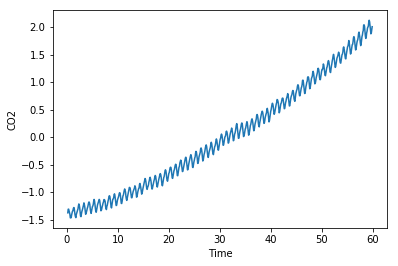

In [17]:
X = data['newcol']
y = data['CO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mean = np.mean(y_train)
std = np.std(y_train)

y = (y - mean)/std

plt.xlabel('Time')
plt.ylabel('CO2')
plt.plot(X, y)
plt.show()

In [18]:
### END Solution

<br/> <!--Intentionally left blank-->

### Part 4.2 (7 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction.
Make sure you've read the documentation!. Consult with the seminar if necessary.

Your general task is:
* to fit a GP and run the predict on the test:
    * useful kernels to combine: `GPy.kern.RBF`, `GPy.kern.Poly`, `GPy.kern.StdPeriodic`, `GPy.kern.White`
* to plot residuals. Inspect them on normality by QQ-plot, try to make them as "normal" as possible
* to provide a point-estimate of $R^2$ score on the test part

In [19]:
### BEGIN Solution

In [20]:
import GPy
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import r2_score

In [21]:
n = X.shape[0]
n_train = int(0.85*n)

X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

X_train = X_train.as_matrix().reshape(-1, 1)
y_train = y_train.as_matrix().reshape(-1, 1)
X_test = X_test.as_matrix().reshape(-1, 1)
y_test = y_test.as_matrix().reshape(-1, 1)

In [22]:
kernel = GPy.kern.RBF(1, variance=2.2, lengthscale=25) + GPy.kern.Poly(1, variance=0.98, scale=0.95) + GPy.kern.StdPeriodic(1)
model = GPy.models.GPRegression(X_train, y_train, kernel)

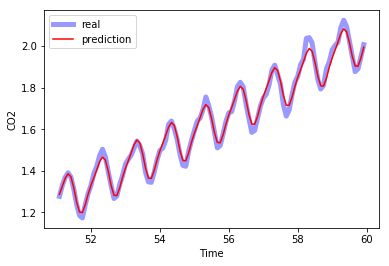

In [23]:
#compare
prediction = model.predict(X_test)[0]
plt.xlabel('Time')
plt.ylabel('CO2')
plt.plot(X_test, y_test, label='real', lw=5, alpha=0.4, c='blue')
plt.plot(X_test, prediction, label='prediction', c='red')
plt.legend()
plt.show()

Text(0.5,1,'residuals')

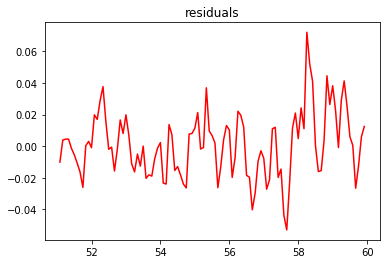

In [24]:
#residuals
prediction = model.predict(X_test)[0]
residuals = y_test - prediction
plt.plot(X_test, residuals, c='red')
plt.title('residuals')

QQ plot


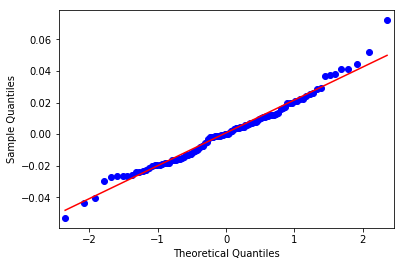

In [25]:
print('QQ plot')
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
qqplot(residuals.reshape(-1), line='s', ax=ax)
plt.show()

In [26]:
print('R2 score is', r2_score(prediction, y_test))

R2 score is 0.991920801207


In [27]:
### END Solution

<br/> <!--Intentionally left blank-->